In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
import matplotlib.cm as cm

In [117]:
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansready.pkl')
scaleddf = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansscaled.pkl')

In [109]:
# df.dtypes

In [118]:
# infocols = ['poet_name','poet_url','poet_poems_url','poet_bio','city','state','country','primary_tag','tags','tag2','tag3','tag4','poem_yrpub']
poemcols = ['poem_link', 'poem_title', 'title_clean','poem_text', 'sentences_x']
outcome = ['label', 'strlabel', 'poet_name', 'primary_tag', 'poem_link', 'text']

#EXCLUDE wordcount, wordcount_d
numerical = ['yrpub', 'numlines','numstanzas' ,'avgline_stanza','enj_score','ttr',
             'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1w_nps_fr','2w_nps_fr','3w_nps_fr']

In [119]:
kdf = df[numerical]
odf = df[outcome]
s_kdf = scaleddf[numerical]
s_odf = scaleddf[outcome]

In [120]:
len(df)
len(scaleddf)
kdf.columns

Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1w_nps_fr', u'2w_nps_fr', u'3w_nps_fr'],
      dtype='object')

In [121]:
X = kdf
for k in xrange(2,14):
    km = KMeans(n_clusters=k, init = 'k-means++', random_state=1)
    km.fit(X)
    labels = km.labels_
    print k, metrics.silhouette_score(X, labels, metric='euclidean')

2 0.620677793522
3 0.443850092572
4 0.465470090241
5 0.403856007834
6 0.429863345086
7 0.438102284672
8 0.37935956604
9 0.376550575979
10 0.332480928953
11 0.334457412075
12 0.333622333279
13 0.343885275299


In [122]:
X_s = s_kdf
len(X_s)
for k in xrange(2,12):
    km = KMeans(n_clusters=k,init ='k-means++', random_state=1)
    km.fit(X_s)
    labels = km.labels_
    print k, metrics.silhouette_score(X_s, labels, metric='euclidean')

2 0.0988542134367
3 0.0875764360864
4 0.0911820819369
5 0.0812134299407
6 0.0828218457472
7 0.0835770775618
8 0.0894880776986
9 0.0865383266168
10 0.0824645284456
11 0.0804788605611


# DID I DO PREPROCESSING WRONG? ^ would appear so.

In [123]:
type(X)
##change to array for plotting
Xx = X.as_matrix()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.62067779352173069)


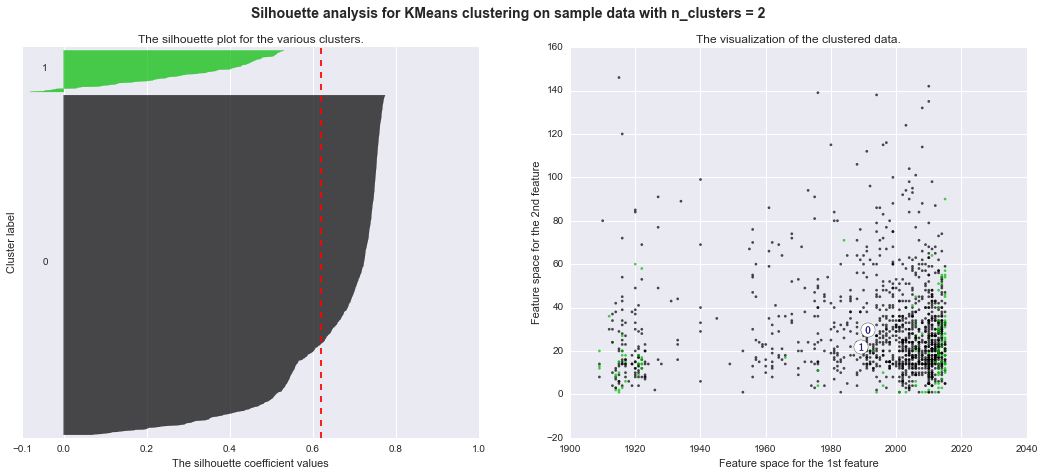

('For n_clusters =', 3, 'The average silhouette_score is :', 0.4438500925718743)


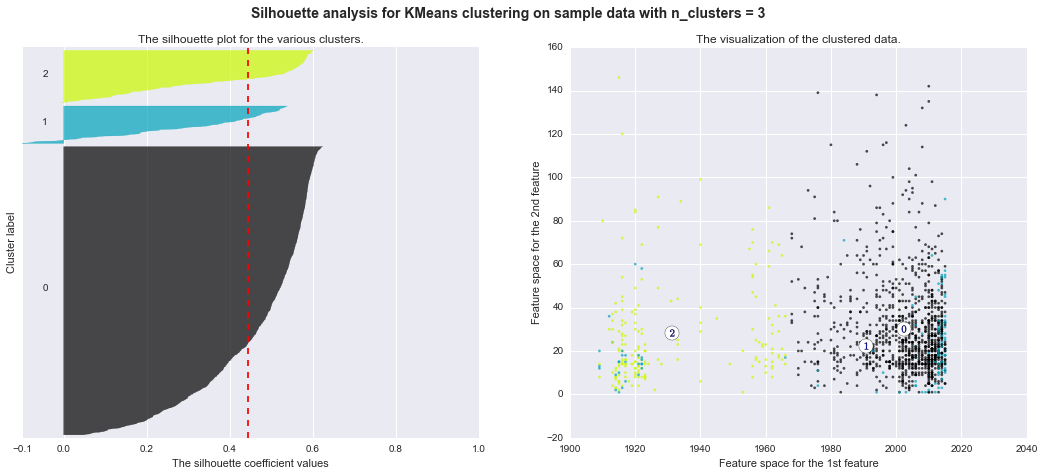

In [124]:
range_n_clusters = [2, 3]
#                     , 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xx) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Xx)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(Xx, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(Xx, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xx[:, 0], Xx[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [125]:
# km = KMeans(n_clusters=2,  init='random', n_init=1 , max_iter = 100, random_state=1)
km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
Y_hat = km.fit(X).labels_
centroids = km.cluster_centers_
y = km.predict(X)
metrics.silhouette_score(X, Y_hat, metric='euclidean')

0.61600153302627736

## lets test the stability of our Kmeans

In [126]:
def shuffle_dataframe(df):
    df2 = df.reindex(np.random.permutation(df.index))
    return df2

In [127]:
scores = []
for i in range(0,10):
    X = Randomizing(kdf)
    km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
    Y_hat = km.fit(X).labels_
    # centroids = km.cluster_centers_
    # y = km.predict(X)
    sc = metrics.silhouette_score(X, Y_hat, metric='euclidean')
    print sc
    scores.append(sc)

# scores = np.array(scores)
print "\n"+str(np.var(scores))

0.620677793522
0.616001533026
0.620677793522
0.620677793522
0.616001533026
0.616001533026
0.616001533026
0.616001533026
0.620677793522
0.616001533026

5.24817893312e-06


In [184]:
X = kdf
km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
Y_hat = km.fit(X).labels_
centroids = km.cluster_centers_
y = km.predict(X)

In [185]:
# centroids = km.cluster_centers_
# centroids
# n = km.labels_
# n = pd.DataFrame(n)
y = pd.DataFrame(y)
y.columns = ['km']

In [186]:
len(odf)
td1 = pd.concat([df[numerical], y], axis = 1).sort('km', ascending = False)

In [140]:
td = td1.groupby('km').mean().transpose()
print td
# print len(td1.query('km == 0 and label ==1'))
# print len(td1.query('km == 0 and label ==0'))
# print len(td1.query('km == 1 and label ==1'))
# print len(td1.query('km == 1 and label ==0'))

km                           0            1
yrpub              1991.446005  1989.574324
numlines             29.780509    22.837838
numstanzas            5.356453     1.344595
avgline_stanza       12.405174    18.643742
enj_score            17.277252   166.121151
ttr                   0.691319     0.727132
abstraction_score     1.282430     1.285430
lesk_abs_score        1.148892     1.162607
pronoun_score         0.383470     0.422914
title_lesk_abs        1.239972     1.233536
conjunction_ratio     5.315585     5.151880
nps_ratio             0.522447     0.523056
vps_ratio             0.338662     0.328527
aps_ratio             0.138891     0.148417
avg_nps_cscore        1.538197     1.565326
avg_vps_cscore        1.993485     2.008256
avg_aps_cscore        1.177917     1.166684
1w_nps_fr             0.615450     0.599279
2w_nps_fr             0.256737     0.258308
3w_nps_fr             0.110520     0.123164


#Let's try visually looking at the centroids

In [187]:
# td1.columns
# centroids
centroids = pd.DataFrame(centroids, columns=numerical)
centroids
centroids["km"] = ["0 centroid", "1 centroid"]
# full_ds = pd.concat([ds[numerical[:5]], centroids], ignore_index=True)

In [189]:
full_ds = pd.concat([td1, centroids], ignore_index=True)

In [210]:
semi =full_ds[1200:]

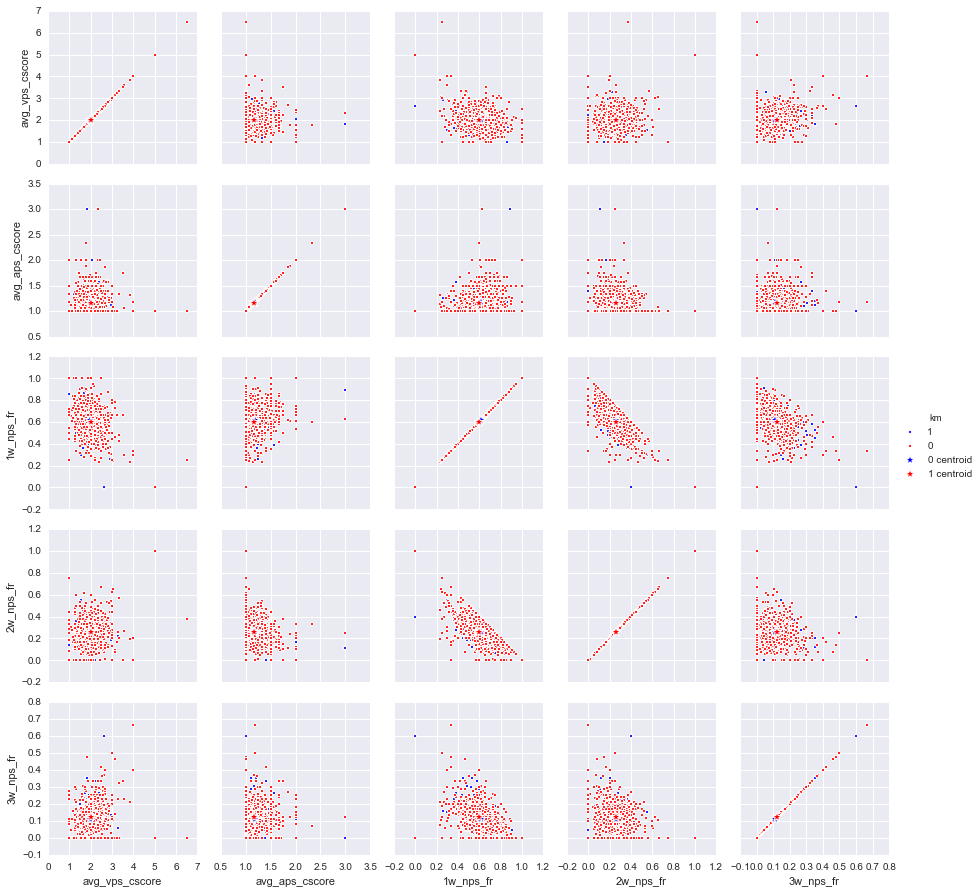

In [224]:
g = sns.PairGrid(full_ds.ix[:,15:], hue="km",
#                  hue_order=["0", "1", "0 centroid", "1 centroid"],
                 palette=["b", "r", "b", "r"],
                 hue_kws={"s": [10, 10, 100, 100],
                          "marker": ["o", "o", "*", "*"]}
                )
g.map(plt.scatter, linewidth=1, edgecolor="w")
g.add_legend()

In [135]:
ac =AgglomerativeClustering(n_clusters=2, linkage = 'ward')
ac.fit(X)
labels = ac.labels_

In [136]:
labels
y = pd.DataFrame(labels)
y.columns = ['ag']

In [140]:
td = pd.concat([odf[['label', 'strlabel', 'poet_name']], y], axis = 1).sort('ag', ascending = False)

In [141]:
print len(td.query('ag == 0 and label ==1'))
print len(td.query('ag == 0 and label ==0'))

print len(td.query('ag == 1 and label ==1'))
print len(td.query('ag == 1 and label ==0'))

663
566
30
28


In [143]:
td.query('ag == 0')

,label,strlabel,poet_name,ag
830,1,Contemp,Alan Dugan,0
944,1,Contemp,Stephen Burt,0
854,1,Contemp,Toi Derricotte,0
855,1,Contemp,Toi Derricotte,0
947,1,Contemp,Dan Chiasson,0
856,1,Contemp,Toi Derricotte,0
826,1,Contemp,Donald Hall,0
857,1,Contemp,Toi Derricotte,0
825,1,Contemp,Donald Hall,0
859,1,Contemp,Toi Derricotte,0


In [144]:
from sklearn.metrics.pairwise import pairwise_distances